# TASK:2
## Prediction Using Decision Tree Algorithm
### Author: CHANDRU T
#### BATCH #GRIP JUNE22

### STEP:1 Importing the library

In [17]:
import numpy as np
import pandas as pd


### Import dataset from sklearn

In [18]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
print(data.feature_names)
print("\n")
df['target'] = data.target


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']




In [19]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [20]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### import visualization library and checking the distribution of the iris dataset


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    50
1    50
2    50
Name: target, dtype: int64


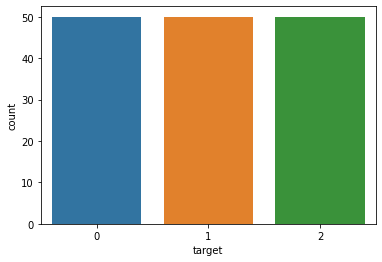

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
#checking the distribution of the iris dataset
sns.countplot(df['target'])
print(df['target'].value_counts())

### We'll do this by using Scikit-Learn's built-in train_test_split() method:
  

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'],test_size=.3)
print(len(X_train))
print(len(X_test))

105
45


## Training the Algorithm
### Fit dataset  for train and test

In [27]:
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
# DT = DecisionTreeClassifier()
DT = DecisionTreeClassifier(criterion="gini")
# Fit model
model = DT.fit(X_train, Y_train)
y_preds = model.predict(X_test)
print(y_preds)
print(data.feature_names)
print("\n")


[2 2 0 0 0 2 0 1 1 2 1 1 0 2 1 0 2 2 1 2 0 1 0 2 1 0 2 0 2 2 0 0 2 1 1 2 1
 0 1 0 2 0 2 0 2]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']




###  The plot tree for decision  tree classification 

[Text(0.4, 0.9, 'petal length (cm) <= 2.6\ngini = 0.665\nsamples = 105\nvalue = [34, 38, 33]\nclass = versicolor'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = setosa'),
 Text(0.5, 0.7, 'petal width (cm) <= 1.65\ngini = 0.498\nsamples = 71\nvalue = [0, 38, 33]\nclass = versicolor'),
 Text(0.2, 0.5, 'petal length (cm) <= 5.0\ngini = 0.139\nsamples = 40\nvalue = [0, 37, 3]\nclass = versicolor'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(0.3, 0.3, 'sepal length (cm) <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(0.8, 0.5, 'petal length (cm) <= 4.85\ngini = 0.062\nsamples = 31\nvalue = [0, 1, 30]\nclass = virginica'),
 Text(0.7, 0.3, 'sepal width (cm) <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virgin

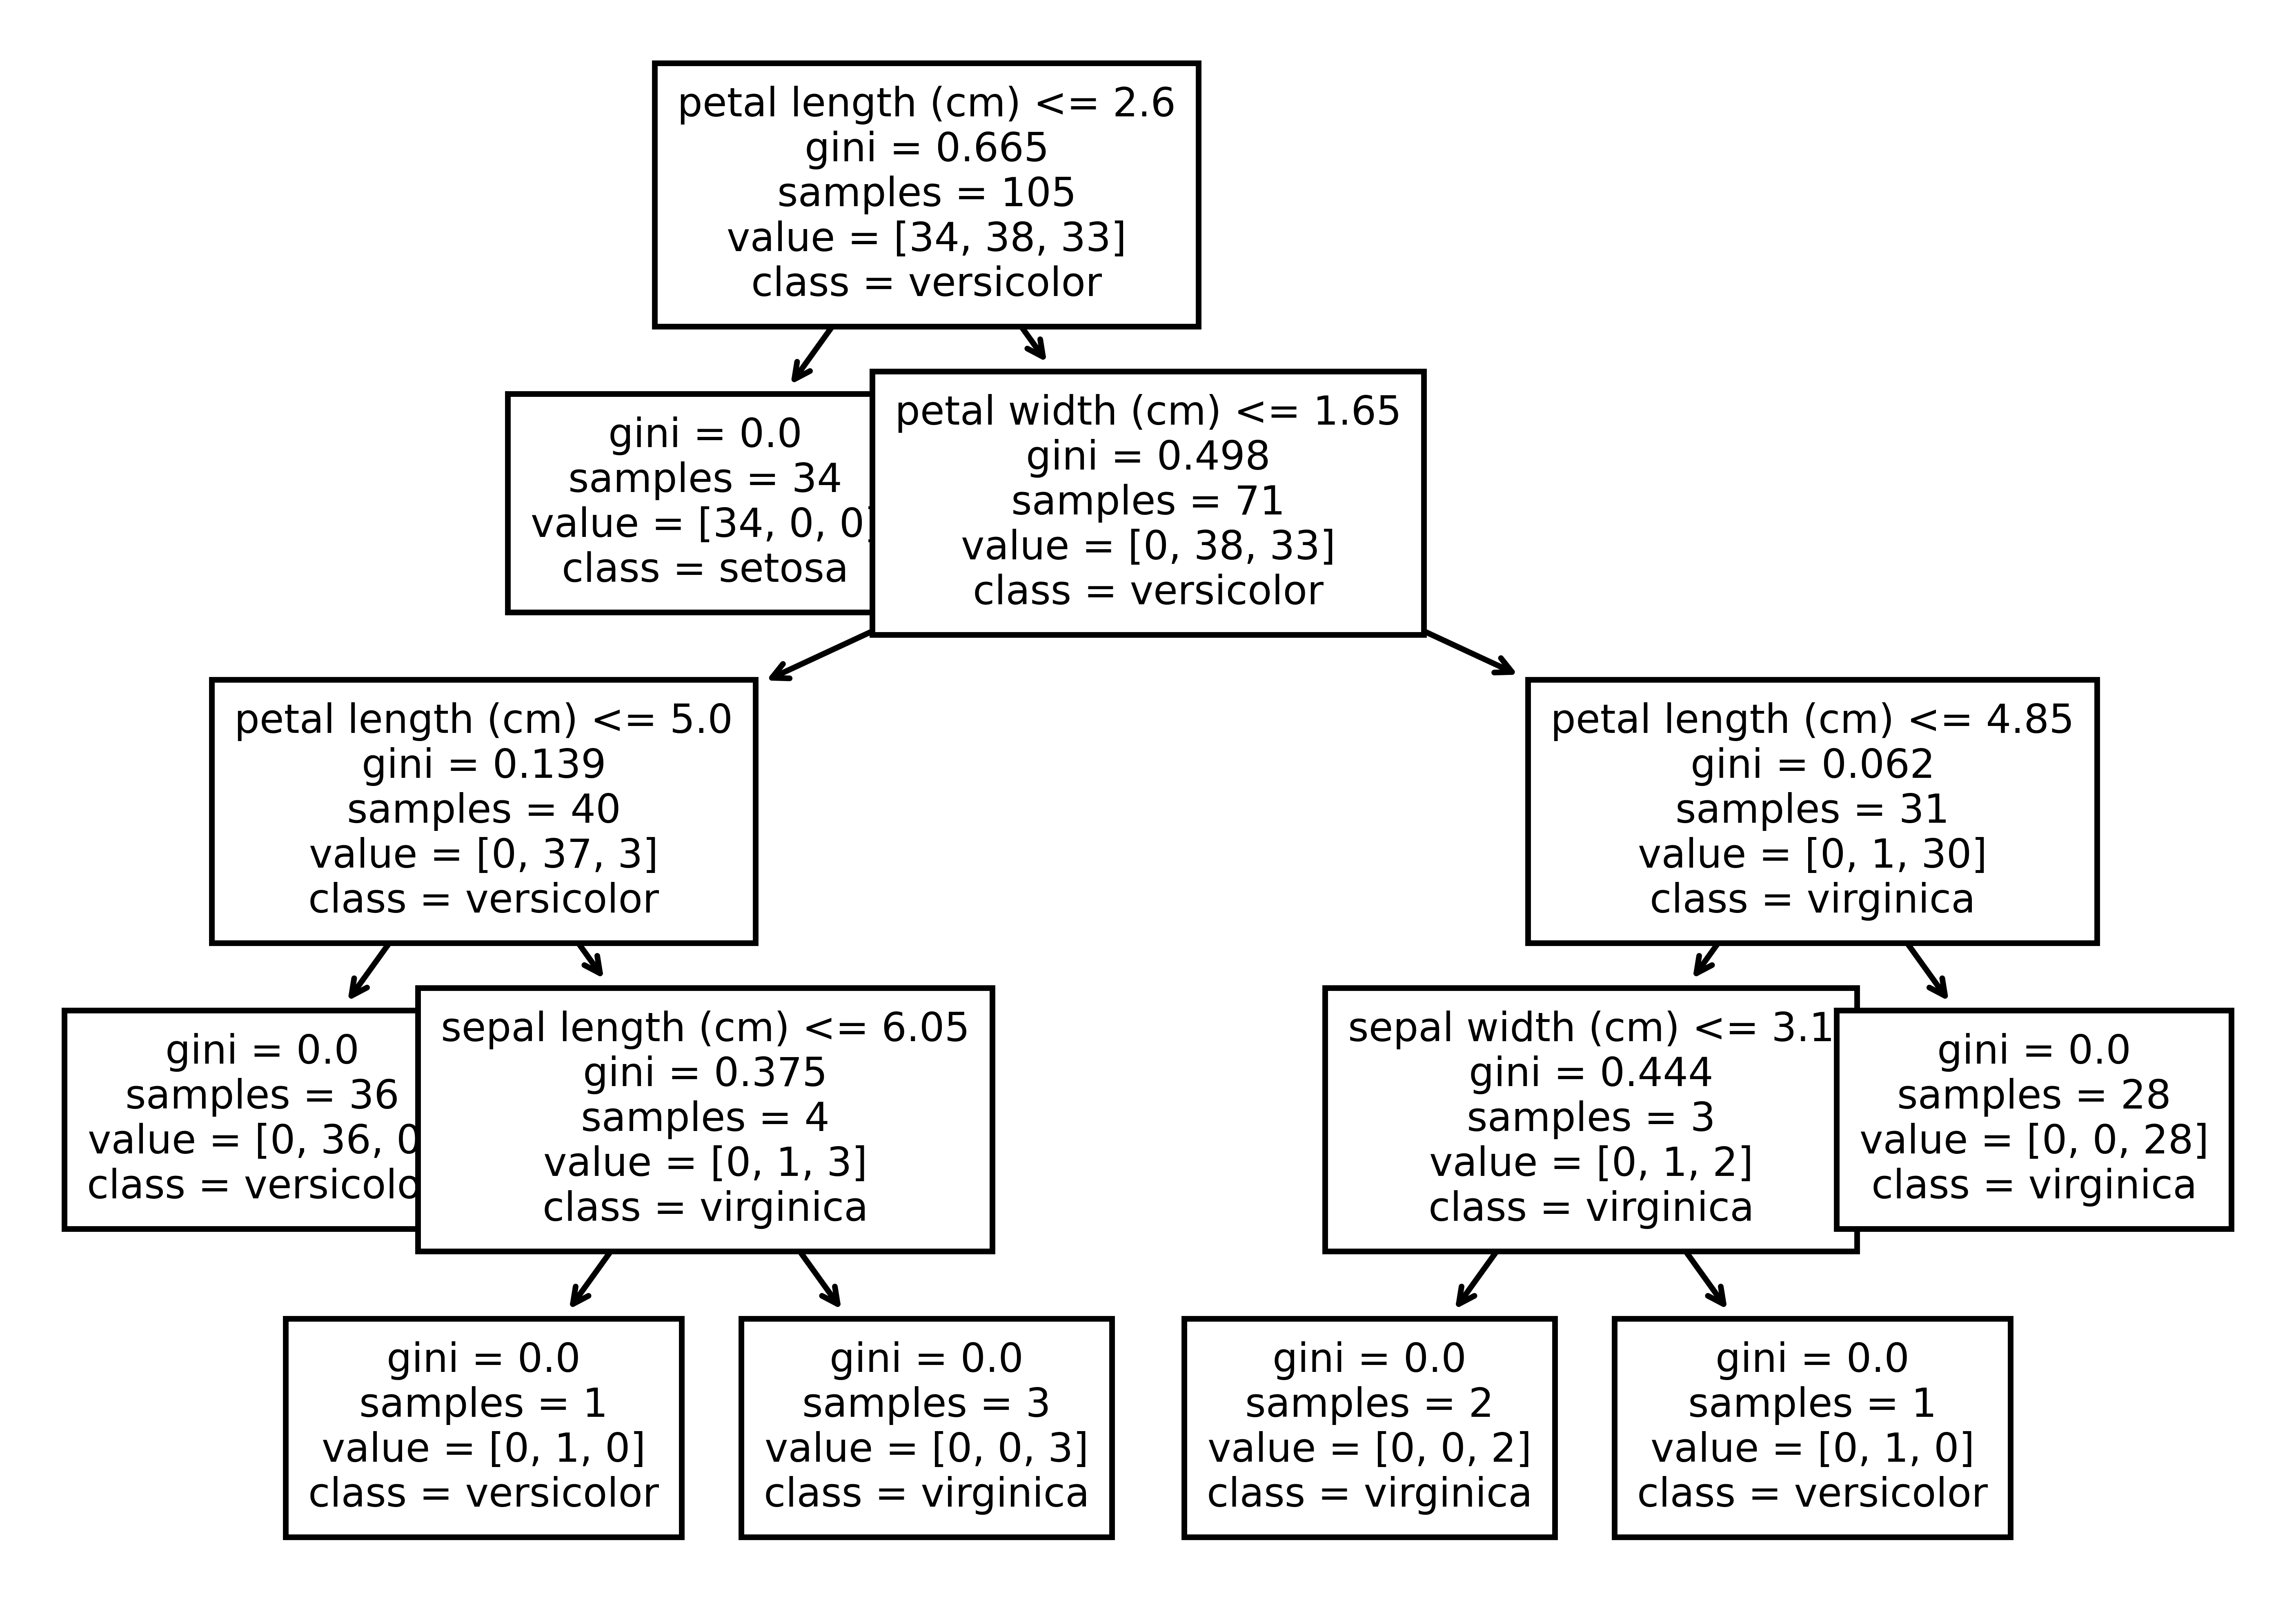

In [35]:
fig, axes =plt.subplots(nrows = 1,ncols = 1,figsize = (7,5), dpi=1000)
tree.plot_tree(DT,fontsize=7, feature_names=data.feature_names, class_names=data.target_names)

### Evaluating the model The final step is to evaluate the performance of algorithm.
### classification_report, confusion_matrix, accuracy_score

In [25]:
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("\n Confustion Matrix : \n",confusion_matrix(Y_test,y_preds))
print("\n")
print("accuracy scores::",accuracy_score(Y_test,y_preds))
print(classification_report(Y_test, y_preds))


 Confustion Matrix : 
 [[16  0  0]
 [ 0 11  1]
 [ 0  1 16]]


accuracy scores:: 0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      0.92      0.92        12
           2       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

